## Notebook18a

In [1]:
! wget -q -nc https://raw.githubusercontent.com/taylor-arnold/fds-py/refs/heads/main/funs.py

In [2]:
! pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 27.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import polars as pl

from funs import *
from plotnine import *
from polars import col as c
theme_set(theme_minimal())

ub = "https://raw.githubusercontent.com/taylor-arnold/fds-py-nb/refs/heads/main/"

### Reading the Data

In [4]:
scotus = pl.read_csv(ub + "data/scotus_case.csv")
scotus = scotus.rename({"citation": "doc_id"})
scotus

doc_id,term,chief,case_name,lean,maj_votes,min_votes,issue,issue_description
str,i64,str,str,str,i64,i64,i64,str
"""3 U.S. 378""",1798,"""Ellsworth""","""HOLLINGSWORTH, et al. VERSUS V…","""conservative""",6,0,90320,"""judicial administration: juris…"
"""3 U.S. 382""",1798,"""Ellsworth""","""BINGHAM, PLAINTIFF IN ERROR, V…","""conservative""",6,0,90320,"""judicial administration: juris…"
"""3 U.S. 386""",1798,"""Ellsworth""","""CALDER ET WIFE, VERSUS BULL ET…","""conservative""",4,0,10180,"""ex post facto (state)"""
"""3 U.S. 401""",1798,"""Ellsworth""","""WILSON VERSUS DANIEL""","""liberal""",5,1,90520,"""miscellaneous judicial power, …"
"""3 U.S. 409""",1798,"""Ellsworth""","""DEWHURST VERSUS COULTHARD""","""conservative""",6,0,90520,"""miscellaneous judicial power, …"
…,…,…,…,…,…,…,…,…
"""577 U.S. 47""",2015,"""Roberts""","""DIRECTV, INC. v. IMBURGIA""","""conservative""",6,3,80160,"""arbitration (other than as per…"
"""577 U.S. 481""",2015,"""Roberts""","""NEBRASKA v. PARKER""","""liberal""",8,0,20160,"""Indians, state jurisdiction ov…"
"""577 U.S. 7""",2015,"""Roberts""","""CHADRIN LEE MULLENIX, PETITION…","""conservative""",8,1,10060,"""search and seizure, vehicles"""


In [5]:
citation = pl.read_csv(ub + "data/scotus_citation.csv")
citation = citation.rename({"citing_case": "doc_id", "cited_case": "doc_id2"})
citation

doc_id,doc_id2
str,str
"""10 U.S. 206""","""9 U.S. 100"""
"""10 U.S. 267""","""8 U.S. 137"""
"""10 U.S. 281""","""8 U.S. 241"""
"""10 U.S. 281""","""8 U.S. 293"""
"""100 U.S. 1""","""88 U.S. 17"""
…,…
"""99 U.S. 700""","""98 U.S. 569"""
"""99 U.S. 80""","""92 U.S. 10"""
"""99 U.S. 86""","""64 U.S. 381"""


**Research Questions**: How are Supreme Court cases related to one another through citations? Can we use network analysis to identify the most influential cases on a particular legal topic, and do cases naturally cluster into distinct sub-communities?

### Questions

1. We are going to start by working with a single legal issue area. Filter the `scotus` dataset to include only cases where the `issue` column equals `20140` ( sex discrimination in employment (cf. sex discrimination) acy). Save the result as `scotus_sml`.

In [7]:
scotus_sml = (
    scotus
    .filter(c.issue == 20140)
)

2. Now we need to build the set of citations that connect cases *within* this issue area. We want to keep only those rows from the `citation` dataset where **both** the citing case and the cited case appear in our filtered set `scotus_sml`. To do this, use two sequential semi joins. The first semi join keeps only rows of `citation` whose `doc_id` appears in `scotus_sml`. The second semi join further filters to keep only rows whose `doc_id2` also appears in `scotus_sml` (you will need to use `left_on` and `right_on` here since the column names differ). Save the result as `citation_sml`.

In [10]:
citation_sml = (
    citation
    .join(scotus_sml, on="doc_id", how="semi")
    .join(scotus_sml, left_on="doc_id2", right_on="doc_id", how="semi")
)

3. Pass `citation_sml` to `DSNetwork.process` with `directed=False` to create an undirected graph. This returns three objects: `node`, `edge`, and `G`. The `node` table contains one row per case along with x/y coordinates for plotting and several centrality metrics (such as `eigen`, `between`, `close`, and `cluster`). The `edge` table contains the segments needed to draw lines between connected nodes. Sort the `node` table by the `eigen` column so that the most central nodes are drawn on top.

In [17]:
node, edge, G = (
    DSNetwork.process(citation_sml, directed=False)
)
(
    node
    .sort(c.eigen, descending=True)
)

id,x,y,component,component_size,cluster,degree,eigen,between,close
str,f64,f64,i64,i64,str,i64,f64,f64,f64
"""429 U.S. 125""",0.517823,0.931418,1,46,"""1""",13,1.0,99.545815,0.48913
"""435 U.S. 702""",-0.782592,0.389715,1,46,"""1""",13,0.969318,126.196429,0.517241
"""499 U.S. 187""",0.352108,-0.246278,1,46,"""1""",11,0.93147,159.837338,0.535714
"""556 U.S. 701""",1.595801,0.778505,1,46,"""1""",13,0.914776,148.620887,0.505618
"""479 U.S. 272""",0.961244,-0.526455,1,46,"""1""",11,0.911364,95.067172,0.494505
…,…,…,…,…,…,…,…,…,…
"""546 U.S. 500""",-4.520287,0.970759,1,46,"""3""",3,0.07635,5.776984,0.343511
"""455 U.S. 385""",-4.121574,1.939051,1,46,"""3""",3,0.070853,4.203968,0.346154
"""539 U.S. 90""",-3.654306,3.133639,1,46,"""3""",1,0.068966,0.0,0.326087


4. Create a network plot of the citation graph. Use `geom_segment` to draw the edges (with `alpha=0.1` so overlapping edges don't obscure the picture) and `geom_point` for the nodes. Color the nodes by their `eigen` (eigenvector centrality) value. Use `theme_void()` to remove axes and gridlines. Eigenvector centrality measures how connected a node is to *other well-connected nodes*, so cases with high eigenvector centrality are cited by many other important cases.

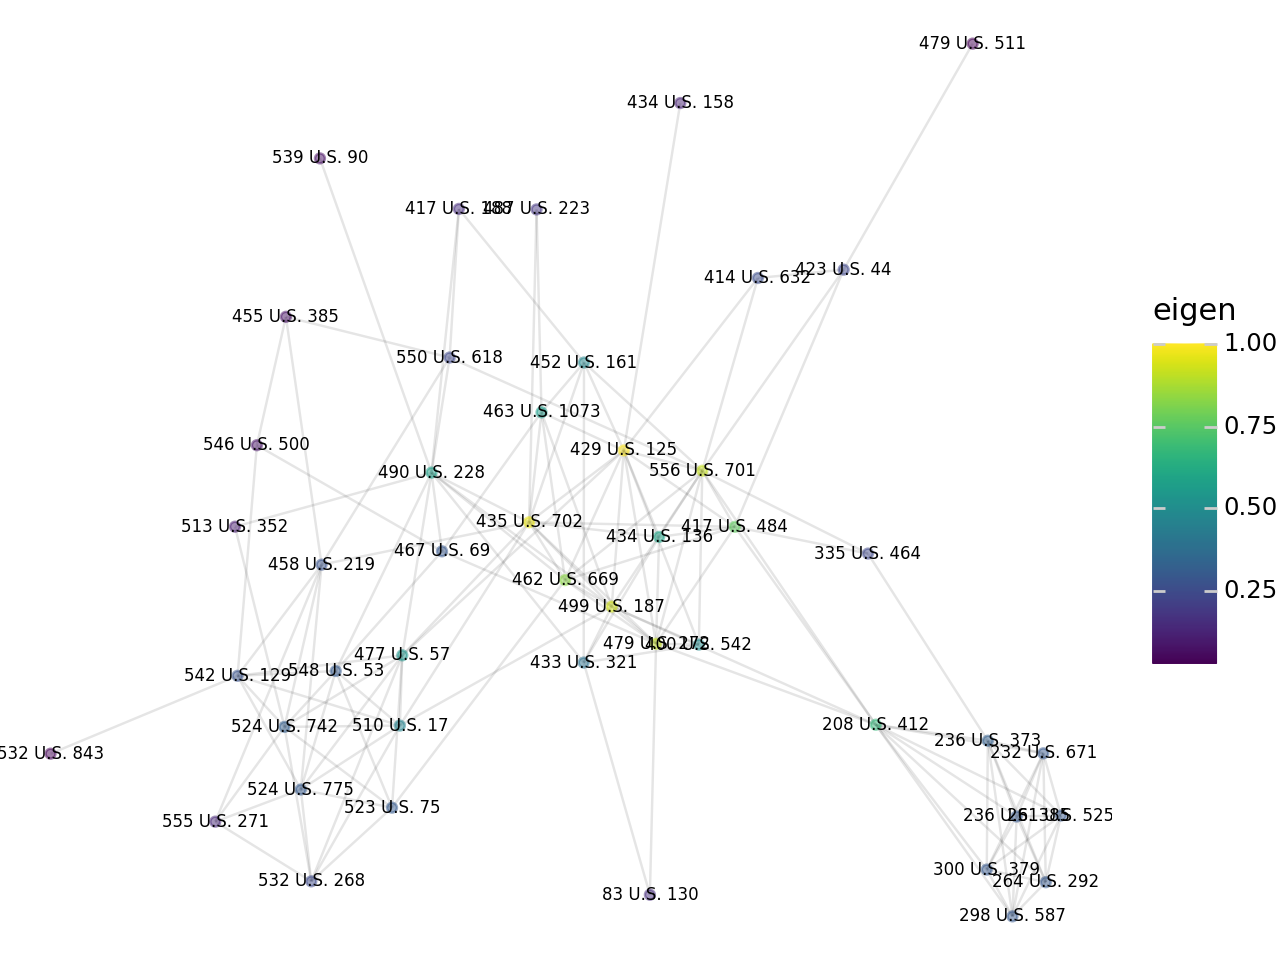

In [19]:
(
    node
    .pipe(ggplot, aes("x", "y"))
    + geom_segment(
        aes(x="x", y="y", xend="xend", yend="yend"),
        data=edge,
        alpha=0.1
    )
    + geom_point(aes(color="eigen"), alpha=0.5)
    + geom_text(aes(label="id"), size=6)
    + theme_void()
)

5. Recreate the same network plot, but now color the nodes by `between` (betweenness centrality). Betweenness centrality measures how often a node lies on the shortest path between other pairs of nodes. A case with high betweenness serves as a critical bridge connecting different parts of the citation network. Compare this plot to the previous one. Are the same nodes highlighted, or do different cases stand out?

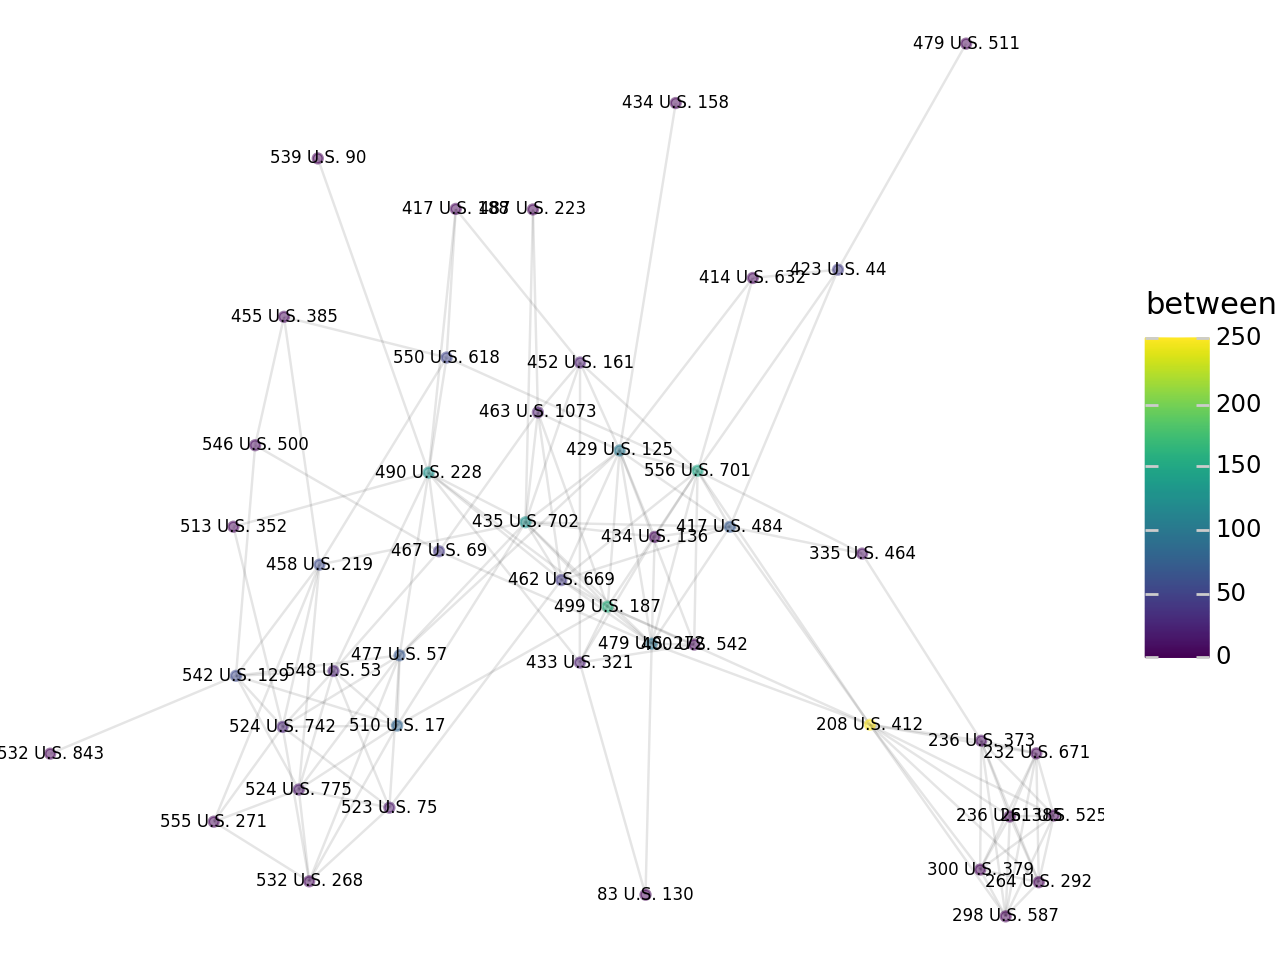

In [20]:
(
    node
    .pipe(ggplot, aes("x", "y"))
    + geom_segment(
        aes(x="x", y="y", xend="xend", yend="yend"),
        data=edge,
        alpha=0.1
    )
    + geom_point(aes(color="between"), alpha=0.5)
    + geom_text(aes(label="id"), size=6)
    + theme_void()
)

6. Recreate the network plot once more, this time coloring by `close` (closeness centrality). Closeness centrality measures how near a node is, on average, to all other nodes in the network. A case with high closeness can "reach" the rest of the network in fewer steps. How does this compare to the two previous centrality measures? Do the same cases tend to rank highly across all three, or do some cases stand out on one metric but not the others?

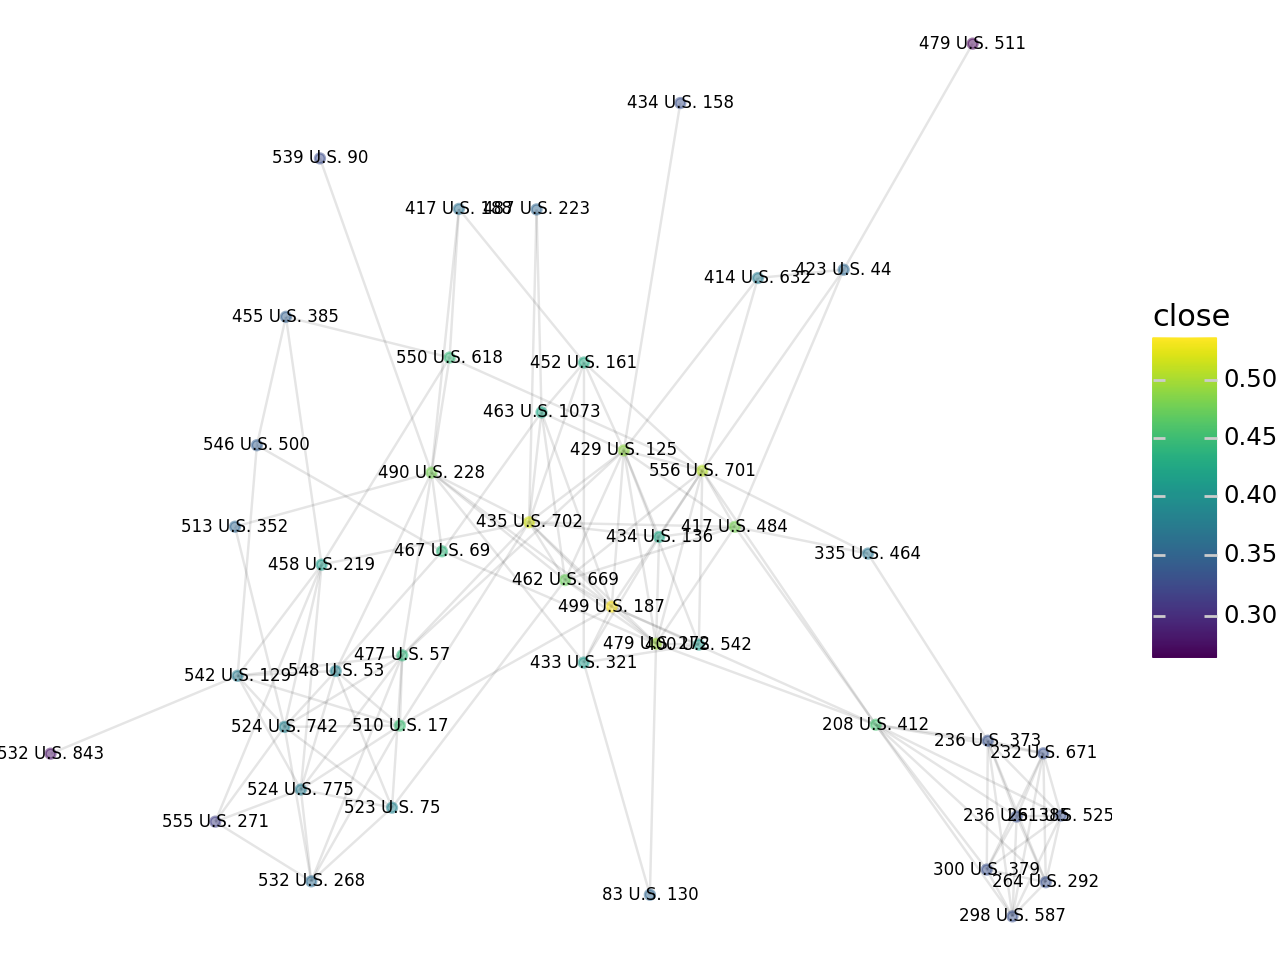

In [21]:
(
    node
    .pipe(ggplot, aes("x", "y"))
    + geom_segment(
        aes(x="x", y="y", xend="xend", yend="yend"),
        data=edge,
        alpha=0.1
    )
    + geom_point(aes(color="close"), alpha=0.5)
    + geom_text(aes(label="id"), size=6)
    + theme_void()
)

7. Now create the network plot colored by `cluster`. The cluster column assigns each node to a community detected by a graph clustering algorithm. This groups cases that are more densely connected to each other than to the rest of the network. Do the clusters correspond to visually distinct groups in the plot? Think about what it might mean for Supreme Court cases on the same legal issue to fall into different clusters. They may represent distinct sub-topics or different eras of legal reasoning.

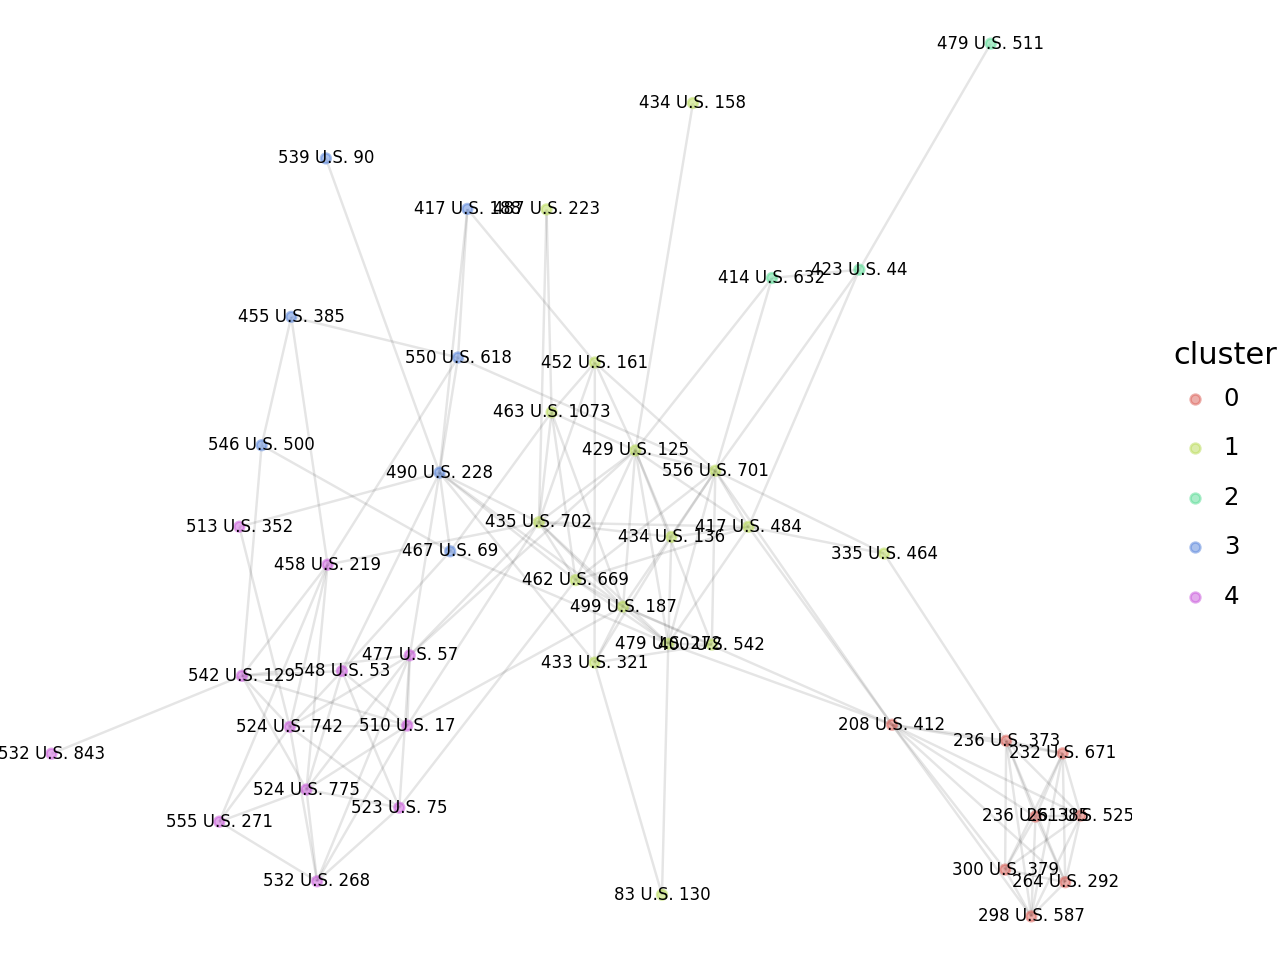

In [22]:
(
    node
    .pipe(ggplot, aes("x", "y"))
    + geom_segment(
        aes(x="x", y="y", xend="xend", yend="yend"),
        data=edge,
        alpha=0.1
    )
    + geom_point(aes(color="cluster"), alpha=0.5)
    + geom_text(aes(label="id"), size=6)
    + theme_void()
)

8. For each cluster, find the case with the highest eigenvector centrality. To do this, group the `node` table by `cluster`, then sort within each group by `eigen` in descending order, and take the first row from each group. Join the result with `scotus` (matching `id` to `doc_id`) so you can see the case names. These are the most influential cases within each cluster. Look up one or two to see what legal questions they addressed.

In [27]:
(
    node
    .sort(c.eigen, descending=True)
    .group_by(c.cluster)
    .head(1)
    .join(scotus, left_on="id", right_on="doc_id")
)

cluster,id,x,y,component,component_size,degree,eigen,between,close,term,chief,case_name,lean,maj_votes,min_votes,issue,issue_description
str,str,f64,f64,i64,i64,i64,f64,f64,f64,i64,str,str,str,i64,i64,i64,str
"""0""","""208 U.S. 412""",3.977535,-1.137121,1,46,11,0.673032,251.527778,0.454545,1907,"""Fuller""","""MULLER, PLAINTIFF IN ERROR, v.…","""conservative""",9,0,20140,"""sex discrimination in employme…"
"""2""","""414 U.S. 632""",2.359379,2.231937,1,46,3,0.25732,3.233333,0.375,1973,"""Burger""","""CLEVELAND BOARD OF EDUCATION e…","""liberal""",7,2,20140,"""sex discrimination in employme…"
"""1""","""429 U.S. 125""",0.517823,0.931418,1,46,13,1.0,99.545815,0.48913,1976,"""Burger""","""GENERAL ELECTRIC CO. v. GILBER…","""conservative""",6,3,20140,"""sex discrimination in employme…"
"""4""","""477 U.S. 57""",-2.523656,-0.613686,1,46,9,0.533615,68.355159,0.441176,1985,"""Burger""","""MERITOR SAVINGS BANK, FSB v. V…","""liberal""",9,0,20140,"""sex discrimination in employme…"
"""3""","""490 U.S. 228""",-2.122448,0.764169,1,46,11,0.576136,128.950397,0.478723,1988,"""Rehnquist""","""PRICE WATERHOUSE v. HOPKINS""","""liberal""",6,3,20140,"""sex discrimination in employme…"


9. Let's see whether the network structure aligns with the historical timeline of the cases. Join `node` with the `scotus` dataset (matching `id` to `doc_id`) and then create the same network plot, but this time color the nodes by `term` (the year the case was decided). Do the clusters you saw earlier correspond to different time periods, or do they cut across eras?

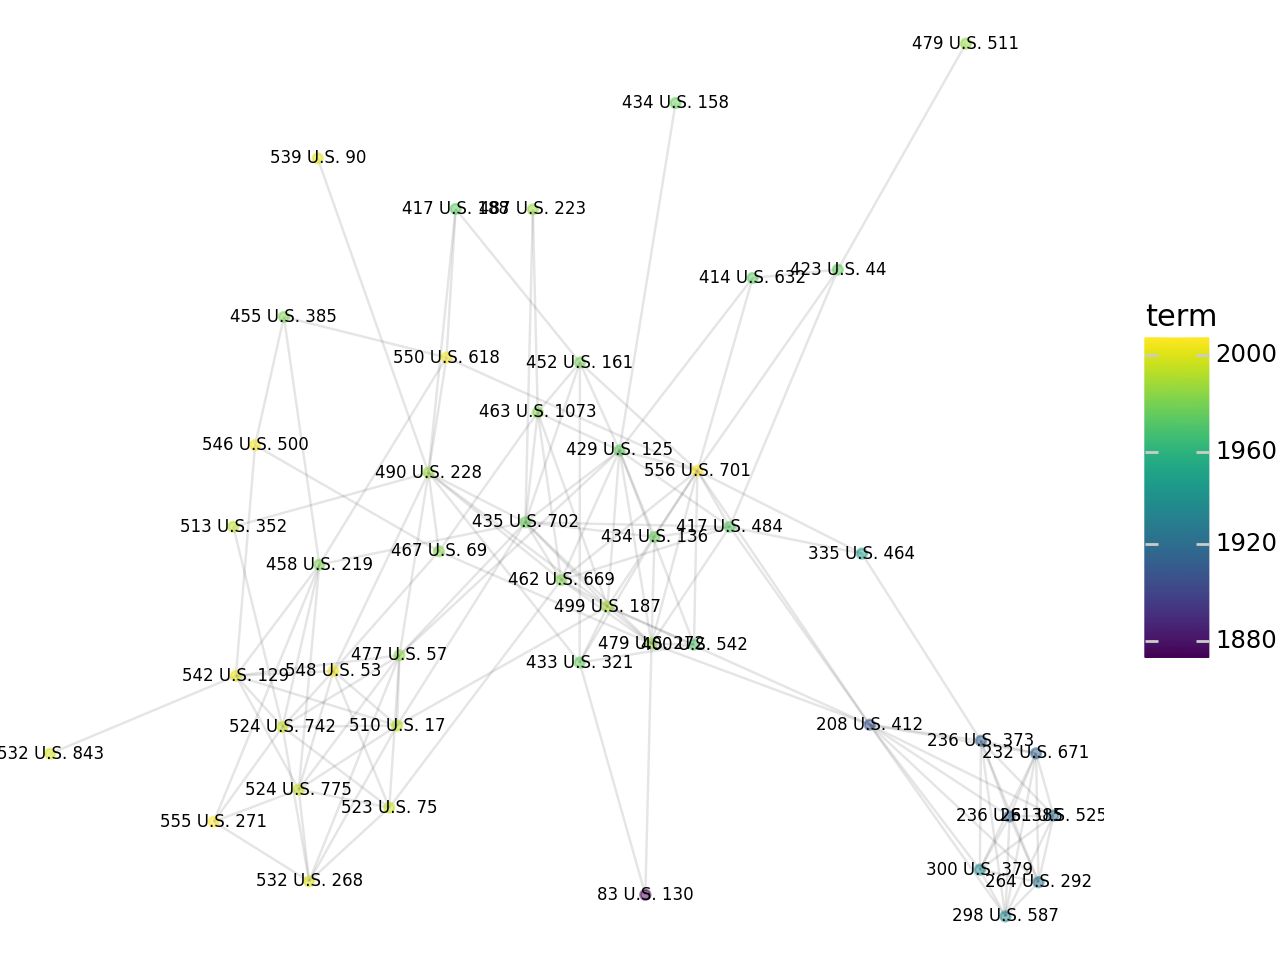

In [28]:
(
    node
    .join(scotus, left_on="id", right_on="doc_id")
    .pipe(ggplot, aes("x", "y"))
    + geom_segment(
        aes(x="x", y="y", xend="xend", yend="yend"),
        data=edge,
        alpha=0.1
    )
    + geom_point(aes(color="term"), alpha=0.5)
    + geom_text(aes(label="id"), size=6)
    + theme_void()
)

10. Pick 3–5 related issues from the list found at [Supreme Court Database](http://scdb.wustl.edu/documentation.php?var=issue). Filter `scotus` to include cases from all of these issue areas using `c.issue.is_in(...)`. Then, build the filtered citation table `citation_sml` using the same two semi joins you used in Question 2. Finally, create the graph with `DSNetwork.process` as before and sort the nodes by `eigen`.

In [33]:
scotus_smlr = (
    scotus
    .filter(c.issue.is_in([10110, 10270, 10590]))
)

citation_smlr = (
    citation
    .join(scotus_smlr, on="doc_id", how="semi")
    .join(scotus_smlr, left_on="doc_id2", right_on="doc_id", how="semi")
)

noder, edger, Gr = (
    DSNetwork.process(citation_smlr, directed=False)
)
(
    noder
    .sort(c.eigen, descending=True)
)

id,x,y,component,component_size,cluster,degree,eigen,between,close
str,f64,f64,i64,i64,str,i64,f64,f64,f64
"""380 U.S. 400""",-1.75937,2.328422,1,123,"""1""",40,1.0,2645.000259,0.497959
"""448 U.S. 56""",-3.219092,3.175709,1,123,"""1""",31,0.971681,163.433646,0.406667
"""400 U.S. 74""",-2.63345,3.24198,1,123,"""1""",31,0.952106,261.950033,0.412162
"""399 U.S. 149""",-2.799055,3.594486,1,123,"""1""",27,0.887152,112.03834,0.40264
"""541 U.S. 36""",-3.340549,2.640178,1,123,"""1""",26,0.884721,93.134627,0.396104
…,…,…,…,…,…,…,…,…,…
"""559 U.S. 196""",17.279772,2.045882,1,123,"""8""",3,0.000065,256.833333,0.203673
"""474 U.S. 231""",16.473302,2.088624,1,123,"""8""",2,0.000065,98.333333,0.202995
"""476 U.S. 321""",19.152299,2.312199,1,123,"""8""",3,0.000007,81.333333,0.170391


11. Plot the resulting graph, coloring by `issue` so you can see whether the different issue areas you selected form distinct communities or are tightly interwoven. Join `node` with `scotus` first so that the `issue` column is available.

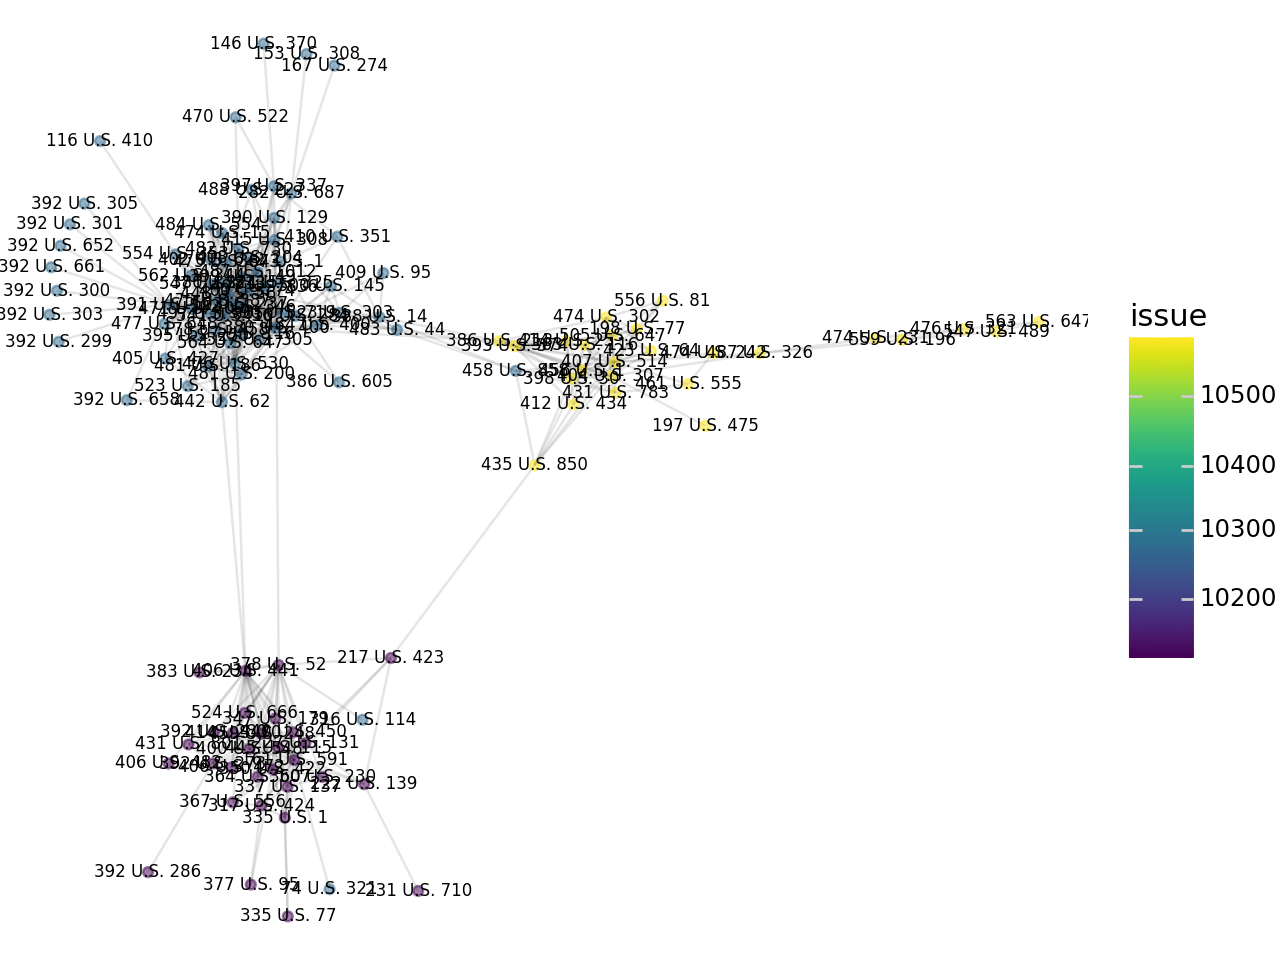

In [34]:
(
    noder
    .join(scotus, left_on="id", right_on="doc_id")
    .pipe(ggplot, aes("x", "y"))
    + geom_segment(
        aes(x="x", y="y", xend="xend", yend="yend"),
        data=edger,
        alpha=0.1
    )
    + geom_point(aes(color="issue"), alpha=0.5)
    + geom_text(aes(label="id"), size=6)
    + theme_void()
)

12. For each issue area, find the two cases with the highest eigenvector centrality. Sort the `node` table by `eigen` in descending order, then join with `scotus` to get the `issue` column. Group by `issue` and use `.head(2)` to take the top two rows from each group. These are the landmark cases within each issue area. These are the ones most heavily cited by other important cases in the network.

In [35]:
(
    noder
    .sort(c.eigen, descending=True)
    .join(scotus, left_on="id", right_on="doc_id")
    .group_by(c.issue)
    .head(2)
)

issue,id,x,y,component,component_size,cluster,degree,eigen,between,close,term,chief,case_name,lean,maj_votes,min_votes,issue_description
i64,str,f64,f64,i64,i64,str,i64,f64,f64,f64,i64,str,str,str,i64,i64,str
10590,"""197 U.S. 475""",11.295675,-0.077263,1,123,"""4""",1,0.000571,0.0,0.244,1904,"""Fuller""","""UNITED STATES v. CADARR""","""conservative""",9,0,"""speedy trial"""
10590,"""198 U.S. 77""",9.207508,2.316868,1,123,"""4""",7,0.002925,1.592857,0.249489,1904,"""Fuller""","""BEAVERS v. HAUBERT""","""conservative""",9,0,"""speedy trial"""
10110,"""161 U.S. 591""",-1.210344,-8.33716,1,123,"""0""",21,0.017808,399.586463,0.33795,1895,"""Fuller""","""BROWN v. WALKER""","""conservative""",5,4,"""self-incrimination, immunity f…"
10110,"""217 U.S. 423""",1.727453,-5.814007,1,123,"""0""",5,0.005804,544.478199,0.337017,1909,"""Fuller""","""HEIKE v. UNITED STATES""","""liberal""",7,0,"""self-incrimination, immunity f…"
10270,"""74 U.S. 321""",-0.138873,-11.525271,1,123,"""0""",1,0.000966,0.0,0.253112,1868,"""Chase""","""TWITCHELL v. THE COMMONWEALTH""","""conservative""",8,0,"""confrontation (right to confro…"
10270,"""116 U.S. 410""",-7.122665,6.956804,1,123,"""10""",1,0.015481,0.0,0.233716,1885,"""Waite""","""EUREKA LAKE & YUBA CANAL COMPA…","""conservative""",9,0,"""confrontation (right to confro…"
